In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
a=np.load('X_train.npy')
b=np.load('Y_train.npy')

In [3]:
from keras_preprocessing.image import ImageDataGenerator

In [4]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [5]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [6]:
input_shape = (224, 224, 3)

In [7]:
num_of_class = 14

In [8]:
img_in = Input(input_shape)              #input of model 
model = ResNet50(include_top= False , # remove  the  fully-connected layers at the top of the network
                weights='imagenet',      # pre train weight 
                input_tensor= img_in, 
                input_shape= input_shape,
                pooling ='avg') 

x = model.output  
predictions = Dense(num_of_class, activation="sigmoid", name="predictions")(x)    # fuly connected layer for predict class 
model = Model(inputs=img_in, outputs=predictions)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [10]:
import keras.backend as K

In [11]:
adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [12]:
def unweighted_binary_crossentropy(y_true, y_pred):
    """
    Args:
        y_true: true labels
        y_pred: predicted labels

    Returns: the sum of binary cross entropy loss across all the classes

    """
    return K.sum(K.binary_crossentropy(y_true, y_pred))

In [13]:
model.compile(optimizer=adam, loss=unweighted_binary_crossentropy, metrics=['accuracy'])

In [14]:
model.fit_generator(datagen.flow(a,b, batch_size=32),
                    steps_per_epoch=100, epochs=400)

Instructions for updating:
Use tf.cast instead.
Epoch 1/400


/opt/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 30s 301ms/step - loss: 186.7695 - acc: 0.2584
Epoch 2/400
100/100 [==============================] - 18s 182ms/step - loss: 144.6412 - acc: 0.2797
Epoch 3/400
100/100 [==============================] - 18s 182ms/step - loss: 139.0864 - acc: 0.2972
Epoch 4/400
100/100 [==============================] - 18s 183ms/step - loss: 135.2322 - acc: 0.3038
Epoch 5/400
100/100 [==============================] - 18s 183ms/step - loss: 136.5581 - acc: 0.3038
Epoch 6/400
100/100 [==============================] - 19s 186ms/step - loss: 135.8513 - acc: 0.2963
Epoch 7/400
100/100 [==============================] - 18s 183ms/step - loss: 134.2223 - acc: 0.3053
Epoch 8/400
100/100 [==============================] - 19s 186ms/step - loss: 135.6247 - acc: 0.2934
Epoch 9/400
100/100 [==============================] - 18s 181ms/step - loss: 135.8338 - acc: 0.2959
Epoch 10/400
100/100 [==============================] - 19s 186ms/step - loss: 134.8877 - acc: 0.3159
E

100/100 [==============================] - 18s 183ms/step - loss: 128.5650 - acc: 0.3362
Epoch 82/400
100/100 [==============================] - 18s 182ms/step - loss: 126.0077 - acc: 0.3275
Epoch 83/400
100/100 [==============================] - 18s 184ms/step - loss: 129.5002 - acc: 0.3206
Epoch 84/400
100/100 [==============================] - 18s 182ms/step - loss: 127.5191 - acc: 0.3191
Epoch 85/400
100/100 [==============================] - 19s 187ms/step - loss: 129.0324 - acc: 0.3153
Epoch 86/400
100/100 [==============================] - 19s 188ms/step - loss: 127.8226 - acc: 0.3197
Epoch 87/400
100/100 [==============================] - 18s 182ms/step - loss: 126.7178 - acc: 0.3209
Epoch 88/400
100/100 [==============================] - 18s 182ms/step - loss: 129.5216 - acc: 0.3206
Epoch 89/400
100/100 [==============================] - 18s 181ms/step - loss: 129.0826 - acc: 0.3247
Epoch 90/400
100/100 [==============================] - 18s 182ms/step - loss: 127.5348 - acc: 

100/100 [==============================] - 18s 181ms/step - loss: 122.7311 - acc: 0.3509
Epoch 161/400
100/100 [==============================] - 18s 181ms/step - loss: 124.6283 - acc: 0.3463
Epoch 162/400
100/100 [==============================] - 18s 183ms/step - loss: 124.8007 - acc: 0.3472
Epoch 163/400
100/100 [==============================] - 18s 181ms/step - loss: 122.1728 - acc: 0.3475
Epoch 164/400
100/100 [==============================] - 18s 182ms/step - loss: 125.4465 - acc: 0.3463
Epoch 165/400
100/100 [==============================] - 18s 181ms/step - loss: 125.0532 - acc: 0.3400
Epoch 166/400
100/100 [==============================] - 18s 182ms/step - loss: 124.2661 - acc: 0.3425
Epoch 167/400
100/100 [==============================] - 18s 181ms/step - loss: 124.3629 - acc: 0.3412
Epoch 168/400
100/100 [==============================] - 18s 181ms/step - loss: 121.9415 - acc: 0.3556
Epoch 169/400
100/100 [==============================] - 18s 181ms/step - loss: 124.640

100/100 [==============================] - 18s 184ms/step - loss: 121.5564 - acc: 0.3634
Epoch 240/400
100/100 [==============================] - 18s 181ms/step - loss: 120.7371 - acc: 0.3656
Epoch 241/400
100/100 [==============================] - 18s 181ms/step - loss: 120.6764 - acc: 0.3541
Epoch 242/400
100/100 [==============================] - 18s 182ms/step - loss: 120.2297 - acc: 0.3638
Epoch 243/400
100/100 [==============================] - 18s 181ms/step - loss: 121.3277 - acc: 0.3503
Epoch 244/400
100/100 [==============================] - 18s 182ms/step - loss: 120.1703 - acc: 0.3591
Epoch 245/400
100/100 [==============================] - 18s 182ms/step - loss: 119.3545 - acc: 0.3697
Epoch 246/400
100/100 [==============================] - 18s 182ms/step - loss: 120.7217 - acc: 0.3516
Epoch 247/400
100/100 [==============================] - 18s 183ms/step - loss: 120.8283 - acc: 0.3519
Epoch 248/400
100/100 [==============================] - 18s 184ms/step - loss: 120.269

100/100 [==============================] - 18s 182ms/step - loss: 119.0699 - acc: 0.3588
Epoch 319/400
100/100 [==============================] - 18s 185ms/step - loss: 118.9979 - acc: 0.3631
Epoch 320/400
100/100 [==============================] - 18s 183ms/step - loss: 118.8537 - acc: 0.3603
Epoch 321/400
100/100 [==============================] - 18s 182ms/step - loss: 118.2969 - acc: 0.3722
Epoch 322/400
100/100 [==============================] - 18s 181ms/step - loss: 118.6655 - acc: 0.3634
Epoch 323/400
100/100 [==============================] - 18s 181ms/step - loss: 119.5435 - acc: 0.3759
Epoch 324/400
100/100 [==============================] - 18s 181ms/step - loss: 117.2089 - acc: 0.3767
Epoch 325/400
100/100 [==============================] - 18s 181ms/step - loss: 119.2038 - acc: 0.3678
Epoch 326/400
100/100 [==============================] - 18s 183ms/step - loss: 117.4936 - acc: 0.3684
Epoch 327/400
100/100 [==============================] - 18s 181ms/step - loss: 118.805

100/100 [==============================] - 18s 182ms/step - loss: 116.4183 - acc: 0.3703
Epoch 398/400
100/100 [==============================] - 18s 181ms/step - loss: 118.0553 - acc: 0.3862
Epoch 399/400
100/100 [==============================] - 18s 182ms/step - loss: 116.8131 - acc: 0.3856
Epoch 400/400
100/100 [==============================] - 18s 182ms/step - loss: 116.8768 - acc: 0.3800


In [15]:
all_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

In [16]:
c=np.load('X_test.npy')

In [17]:
d=np.load('Y_test.npy')

In [18]:
pred_Y = model.predict(c, batch_size = 32, verbose = True)

10352/10352 [==============================] - 19s 2ms/step


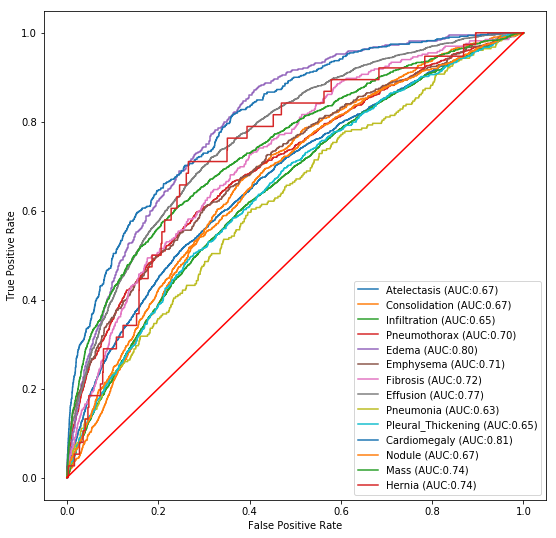

In [19]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(d[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
x = np.linspace(0,1,100)
y=x
c_ax.plot(x,y,'-r')
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('RESNETold 400.png')

In [20]:
id=[1,11,2,5,8,6,7,14,3,13,12,10,9,4]

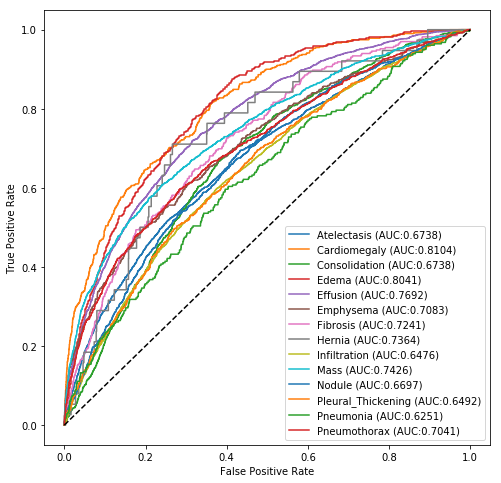

In [21]:
fig1, c_ax1 = plt.subplots(1,1, figsize = (8, 8))
for i in range(14):
    k=id[i]
    c_label=all_labels[k-1]
    fpr, tpr, thresholds = roc_curve(d[:,k-1].astype(int), pred_Y[:,k-1])
    c_ax1.plot(fpr, tpr, label = '%s (AUC:%0.4f)'  % (c_label, auc(fpr, tpr)))
x = np.linspace(0,1,100)
y=x
c_ax1.plot(x,y,'--k')
c_ax1.legend()
c_ax1.set_xlabel('False Positive Rate')
c_ax1.set_ylabel('True Positive Rate')
fig1.savefig('RESNETold 4001.png')

In [22]:
np.save("Predictions_ResNet400",pred_Y)

In [23]:
pred_Y.shape

(10352, 14)